In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('drive/My Drive/MLB-LAB/Dataset/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [23]:
X = dataset.iloc[:, 2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [24]:
Y = dataset.iloc[:,4].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# encoder = LabelEncoder()
# X[:,0] = encoder.fit_transform(X[:,0])
# X

array([[1, 1, 19000],
       [1, 17, 20000],
       [0, 8, 43000],
       ...,
       [0, 32, 20000],
       [1, 18, 33000],
       [0, 31, 36000]], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
# Linear SVM
Y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[66,  2],
       [ 8, 24]])

In [36]:
from sklearn import metrics
prediction = metrics.accuracy_score(Y_test, Y_pred)
print(f"Linear SVM Accuracy: ",prediction*100,"%")

Linear SVM Accuracy:  90.0 %


<ipython-input-37-b678d7fc4307>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


<function matplotlib.pyplot.show(close=None, block=None)>

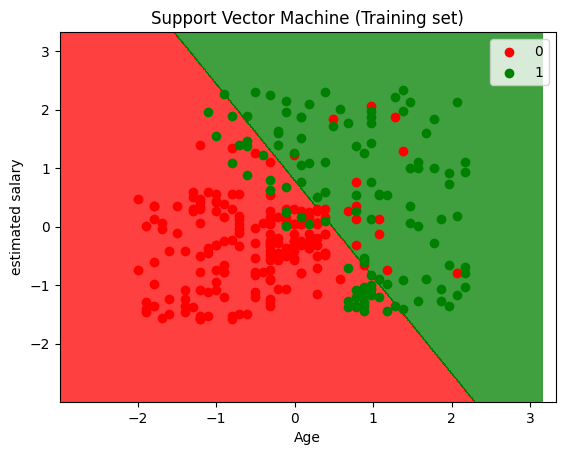

In [37]:
from matplotlib.colors import ListedColormap

X_set , Y_set = X_train ,Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),

                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))

plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())

plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):

  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],

              c = ListedColormap(('red','green'))(i),label =j)

plt.title('Support Vector Machine (Training set)')

plt.xlabel('Age')

plt.ylabel('estimated salary')

plt.legend()

plt.show

<ipython-input-38-62d39c8b02f7>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


<function matplotlib.pyplot.show(close=None, block=None)>

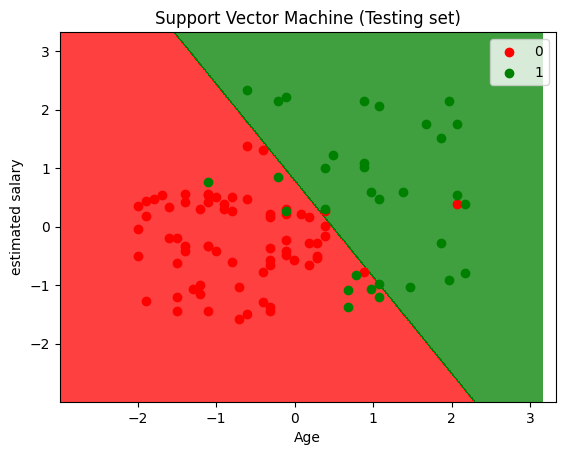

In [38]:
from matplotlib.colors import ListedColormap

X_set , Y_set = X_test ,Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),

                     np.arange(start = X_set[:,0].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))

plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())

plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):

  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],

              c = ListedColormap(('red','green'))(i),label =j)

plt.title('Support Vector Machine (Testing set)')

plt.xlabel('Age')

plt.ylabel('estimated salary')

plt.legend()

plt.show